<a href="https://colab.research.google.com/github/MelisaYasak/gradiant_descent/blob/main/Proje_1_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ml ödevi')

#Veri Ön İşleme Adımları

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
X = df.drop(['id', 'price', 'date'], axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#x = firstQuestionDF
y = df["price"]


In [ ]:
# Normalize our features
X = (X - X.min()) / (X.max()-X.min())
print(X)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0      0.090909    0.12500     0.067170  0.003108     0.0         0.0   0.0   
1      0.090909    0.28125     0.172075  0.004072     0.4         0.0   0.0   
2      0.060606    0.12500     0.036226  0.005743     0.0         0.0   0.0   
3      0.121212    0.37500     0.126038  0.002714     0.0         0.0   0.0   
4      0.090909    0.25000     0.104906  0.004579     0.0         0.0   0.0   
...         ...        ...          ...       ...     ...         ...   ...   
21608  0.090909    0.31250     0.093585  0.000370     0.8         0.0   0.0   
21609  0.121212    0.31250     0.152453  0.003206     0.4         0.0   0.0   
21610  0.060606    0.09375     0.055094  0.000503     0.4         0.0   0.0   
21611  0.090909    0.31250     0.098868  0.001132     0.4         0.0   0.0   
21612  0.060606    0.09375     0.055094  0.000337     0.4         0.0   0.0   

       condition     grade  sqft_above  sqft_baseme

In [ ]:
np.ones(X.shape[0])

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
# Add a 1 column theta0
X = np.c_[np.ones(X.shape[0]), X]
X

array([[1.00000000e+00, 9.09090909e-02, 1.25000000e-01, ...,
        2.17607973e-01, 1.61934263e-01, 5.74235339e-03],
       [1.00000000e+00, 9.09090909e-02, 2.81250000e-01, ...,
        1.66112957e-01, 2.22164860e-01, 8.02711852e-03],
       [1.00000000e+00, 6.06060606e-02, 1.25000000e-01, ...,
        2.37541528e-01, 3.99414903e-01, 8.51301880e-03],
       ...,
       [1.00000000e+00, 6.06060606e-02, 9.37500000e-02, ...,
        1.82724252e-01, 1.06866288e-01, 1.55763777e-03],
       [1.00000000e+00, 9.09090909e-02, 3.12500000e-01, ...,
        3.73754153e-01, 1.73980382e-01, 7.30573466e-04],
       [1.00000000e+00, 6.06060606e-02, 9.37500000e-02, ...,
        1.82724252e-01, 1.06866288e-01, 8.10982495e-04]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_test)
print(X_train)
print(X_test.shape)
print(X_train.shape)

[[1.00000000e+00 1.21212121e-01 2.81250000e-01 ... 2.96511628e-01
  3.42626054e-01 8.09718924e-03]
 [1.00000000e+00 1.51515152e-01 3.75000000e-01 ... 1.94352159e-01
  3.39184306e-01 6.46948075e-03]
 [1.00000000e+00 1.21212121e-01 3.12500000e-01 ... 3.23920266e-01
  5.69781449e-01 1.03773596e-02]
 ...
 [1.00000000e+00 1.21212121e-01 2.50000000e-01 ... 1.00498339e-01
  1.55050766e-01 4.93826310e-03]
 [1.00000000e+00 9.09090909e-02 4.06250000e-01 ... 1.53654485e-01
  1.56771640e-01 6.20298226e-04]
 [1.00000000e+00 9.09090909e-02 2.50000000e-01 ... 2.99003322e-01
  2.10118740e-01 8.04320033e-03]]
[[1.         0.12121212 0.34375    ... 0.1345515  0.26862846 0.00350813]
 [1.         0.09090909 0.3125     ... 0.26162791 0.3064877  0.00980186]
 [1.         0.12121212 0.21875    ... 0.26993355 0.2927207  0.01340993]
 ...
 [1.         0.09090909 0.3125     ... 0.40448505 0.22216486 0.00229625]
 [1.         0.03030303 0.09375    ... 0.1627907  0.1326794  0.0164827 ]
 [1.         0.12121212 0.3125

# Fonksiyonların yazılması

In [ ]:
def cost_function(X, y, theta):
  m = len(y)
  error = X.dot(theta)-y
  j = (1 / 2 * m) * np.sum(np.square(error))
  return j

In [ ]:
def gradient_descent(X, y, theta, alpha, iters):
  cost = np.zeros(iters)
  thetas = np.zeros((iters,X.shape[1]))
  m = len(y)
  for i in range(iters):
    cost[i] = cost_function(X, y, theta)
    error = X.dot(theta)-y
    theta = theta - (1/m) *alpha*np.dot(X.T, error)
    
    thetas[i,:] =theta.T
    print(theta, i)
  return cost, thetas

In [ ]:
def plotChart(x,y,xlabel, ylabel, title):
  fig, ax = plt.subplots()
  ax.plot(x, y, 'r')
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  plt.savefig(title)
  plt.show()

#Train

##Alpha 0.01, iter 14480 theta 0 (theta1)

In [ ]:
alpha = 0.01
iterations = 14480
theta1 = np.zeros(X.shape[1])

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[-325863.08850991   17442.11852119  411773.56042561  543140.59634025
   22941.76957064  123584.72990926  302087.55412056  327471.88674372
   53075.99977691  664663.12778685  614975.86960237  329467.42131424
 -290832.81262813   57596.63637918 -115950.70764578  380007.96715527
 -198424.95237575  510121.68108562    7447.62056311] 13480
[-325873.67564207   17437.76908121  411777.16032434  543151.47838573
   22942.23746012  123578.85183299  302099.34240945  327462.78597935
   53078.41066363  664681.13548833  614990.23272225  329470.15895933
 -290834.68147869   57594.3369466  -115949.25308383  380007.41399855
 -198432.60211765  510118.57344396    7446.67423266] 13481
[-325884.26169492   17433.41945639  411780.7592941   543162.35927289
   22942.70531801  123572.97409854  302111.1302168   327453.68605901
   53080.82138298  664699.14204642  615004.59457405  329472.8958196
 -290836.54968042   57592.03805626 -115947.7986575   380006.8607911
 -198440.

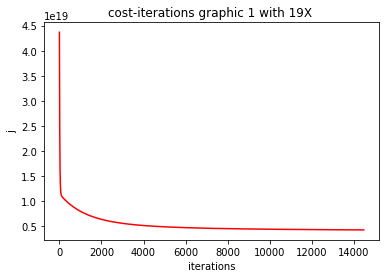

With final theta values of [-335928.64510565   13010.7198373   414931.86495097  553463.99053116
   23394.38683131  117884.0899099   313626.13352335  318798.71484089
   55401.85095835  682106.31902058  628722.53514903  331835.75808686
 -292404.67374611   55551.06939556 -114568.29383817  379441.06090502
 -205679.37909346  506498.20362884    6489.66334782]


In [ ]:
initial_cost = cost_function(X_train, y_train, theta1)
print(X)
print(theta1)
print('With initial theta values of {0}, cost error is {1}'.format(theta1, initial_cost))

# Run Gradient Descent
cost1, thetas1 = gradient_descent(X_train, y_train, theta1, alpha, iterations)
# Display cost chart
plotChart(np.arange(iterations), cost1, 'iterations', 'j', 'cost-iterations graphic 1 with 19X ')

print('With final theta values of {0}'.format(thetas1[-1]))



In [ ]:
cost_function(X_train, y_train, thetas1[-1])

4.282994260960427e+18

##Alpha 0.01, iter 100 theta 0 (theta2)

In [ ]:
alpha = 0.3
iterations = 14480
theta2 = np.zeros(X.shape[1])

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[-455680.34454466 -901676.39656958  321362.33615543  831349.14516811
   84930.36065728   21739.70159701  522803.32379892  225802.47649109
   92576.57124228 1147032.54857161 1001985.33953109  389475.07820621
 -298046.48696991   43871.25692076 -108848.89438455  369800.93233739
 -230344.65822934  119281.74327784 -213312.41787386] 13480
[-455677.82928243 -901700.51827351  321364.18444697  831351.86166888
   84935.39766008   21739.60725961  522802.95095158  225802.22942151
   92576.65849105 1147030.47997258 1001988.4464937   389476.66703114
 -298046.66688274   43871.15804477 -108849.05044155  369800.82402236
 -230344.81483693  119281.57613998 -213319.17940648] 13481
[-455675.3143676  -901724.63660257  321366.03250752  831354.57776941
   84940.43450607   21739.51293549  522802.57815674  225801.98238545
   92576.74572813 1147028.41164454 1001991.55299835  389478.25562236
 -298046.84676908   43871.05918226 -108849.20647756  369800.71572427
 -23034

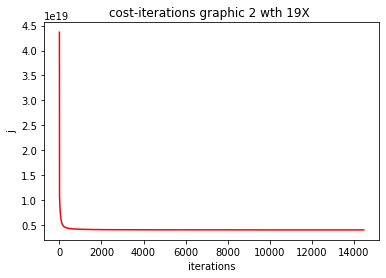

With final theta values of 0.0


In [ ]:
initial_cost = cost_function(X_train, y_train, theta2)
print(X)
print(theta2)
print('With initial theta values of {0}, cost error is {1}'.format(theta2, initial_cost))

# Run Gradient Descent
cost2, thetas2 = gradient_descent(X_train, y_train, theta2, alpha, iterations)
# Display cost chart
plotChart(np.arange(iterations), cost2, 'iterations', 'j', 'cost-iterations graphic 2 wth 19X ')
print('With final theta values of {0}'.format(theta2[-1]))



In [ ]:
cost_function(X_train, y_train, thetas2[-1])

3.996683772061551e+18

##Alpha 0.01 iter 400 theta rand (theta3)


In [ ]:
alpha = 0.01
iterations = 400
theta3= np.random.randn(X.shape[1])

[[1.00000000e+00 9.09090909e-02 1.25000000e-01 ... 2.17607973e-01
  1.61934263e-01 5.74235339e-03]
 [1.00000000e+00 9.09090909e-02 2.81250000e-01 ... 1.66112957e-01
  2.22164860e-01 8.02711852e-03]
 [1.00000000e+00 6.06060606e-02 1.25000000e-01 ... 2.37541528e-01
  3.99414903e-01 8.51301880e-03]
 ...
 [1.00000000e+00 6.06060606e-02 9.37500000e-02 ... 1.82724252e-01
  1.06866288e-01 1.55763777e-03]
 [1.00000000e+00 9.09090909e-02 3.12500000e-01 ... 3.73754153e-01
  1.73980382e-01 7.30573466e-04]
 [1.00000000e+00 6.06060606e-02 9.37500000e-02 ... 1.82724252e-01
  1.06866288e-01 8.10982495e-04]]
[ 0.5172514   0.07282446 -0.55125086  0.25226798 -0.7152663  -0.34135031
 -2.32764     1.58186666  1.05987597  0.50597635  0.44997973  2.31153411
 -1.40142946  0.09255171 -0.60294025 -0.53515422  0.39653274 -1.59561515
 -0.92760478]
With initial theta values of [ 0.5172514   0.07282446 -0.55125086  0.25226798 -0.7152663  -0.34135031
 -2.32764     1.58186666  1.05987597  0.50597635  0.44997973  2.3

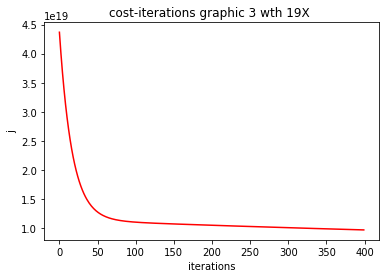

With final theta values of [135199.4862846   23748.20280606  91639.35545965  75172.54512292
   3994.48076916  75860.46757886  26487.47534577  97586.94793823
  89714.46450699 149767.35265891  85428.48212364  45008.37526344
  74068.09958819  40103.20581096  28603.3954856  159357.29031056
  34274.63002302 115991.41817985   4898.92726476]


In [ ]:
initial_cost = cost_function(X_train, y_train, theta3)
print(X)
print(theta3)
print('With initial theta values of {0}, cost error is {1}'.format(theta3, initial_cost))

# Run Gradient Descent
cost3, thetas3 = gradient_descent(X_train, y_train, theta3, alpha, iterations)
# Display cost chart
plotChart(np.arange(iterations), cost3, 'iterations', 'j', 'cost-iterations graphic 3 wth 19X ')

print('With final theta values of {0}'.format(thetas3[-1]))



In [ ]:
cost_function(X_train, y_train, thetas3[-1])

9.742520136257004e+18

##Alpha 0.3 iter 400 theta rand (theta4)

In [ ]:
alpha = 0.3
iterations = 400
theta4= np.random.randn(X.shape[1])

[[1.00000000e+00 9.09090909e-02 1.25000000e-01 ... 2.17607973e-01
  1.61934263e-01 5.74235339e-03]
 [1.00000000e+00 9.09090909e-02 2.81250000e-01 ... 1.66112957e-01
  2.22164860e-01 8.02711852e-03]
 [1.00000000e+00 6.06060606e-02 1.25000000e-01 ... 2.37541528e-01
  3.99414903e-01 8.51301880e-03]
 ...
 [1.00000000e+00 6.06060606e-02 9.37500000e-02 ... 1.82724252e-01
  1.06866288e-01 1.55763777e-03]
 [1.00000000e+00 9.09090909e-02 3.12500000e-01 ... 3.73754153e-01
  1.73980382e-01 7.30573466e-04]
 [1.00000000e+00 6.06060606e-02 9.37500000e-02 ... 1.82724252e-01
  1.06866288e-01 8.10982495e-04]]
[-2.64012879e+00 -6.66625459e-02 -1.14676272e+00  6.43052684e-01
  3.13188852e-01  1.57375905e+00 -2.27695437e-01  1.63351055e+00
 -1.13775751e+00  5.80871070e-01  1.26452422e+00 -5.56380499e-01
  1.26552247e+00 -1.07959363e+00  1.60832489e+00  5.06555304e-02
  9.58870660e-04 -6.79689712e-01 -1.05495146e+00]
With initial theta values of [-2.64012879e+00 -6.66625459e-02 -1.14676272e+00  6.43052684e

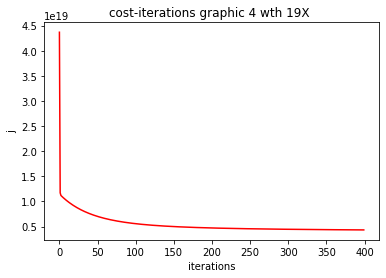

With final theta values of [-309138.38386878   23702.60237768  405538.11034186  525901.59037253
   22218.26593744  132602.4790834   284180.18284178  341730.15011287
   49350.2250414   636896.3076984   592479.62687069  324643.6111274
 -287413.38804153   61536.41823462 -118223.16589795  380758.78713278
 -186326.75662404  513613.90648024    8820.68920619]


In [ ]:
print(X)
print(theta4)
print('With initial theta values of {0}'.format(theta4))

# Run Gradient Descent
cost4, thetas4 = gradient_descent(X_train, y_train, theta4, alpha, iterations)
# Display cost chart
plotChart(np.arange(iterations), cost4, 'iterations', 'j', 'cost-iterations graphic 4 wth 19X ')


print('With final theta values of {0}'.format(thetas4[-1]))



In [ ]:
cost_function(X_train, y_train, thetas4[-1])

4.344870433290913e+18

##Alpha 0.01 iter 150 theta rand (theta5)

In [ ]:
alpha = 0.01
iterations = 150
theta5= np.random.randn(X.shape[1])

[[1.00000000e+00 9.09090909e-02 1.25000000e-01 ... 2.17607973e-01
  1.61934263e-01 5.74235339e-03]
 [1.00000000e+00 9.09090909e-02 2.81250000e-01 ... 1.66112957e-01
  2.22164860e-01 8.02711852e-03]
 [1.00000000e+00 6.06060606e-02 1.25000000e-01 ... 2.37541528e-01
  3.99414903e-01 8.51301880e-03]
 ...
 [1.00000000e+00 6.06060606e-02 9.37500000e-02 ... 1.82724252e-01
  1.06866288e-01 1.55763777e-03]
 [1.00000000e+00 9.09090909e-02 3.12500000e-01 ... 3.73754153e-01
  1.73980382e-01 7.30573466e-04]
 [1.00000000e+00 6.06060606e-02 9.37500000e-02 ... 1.82724252e-01
  1.06866288e-01 8.10982495e-04]]
[ 0.39942788  2.12335224 -0.68123553 -0.30739914 -1.34253563 -1.43862676
 -0.36719441 -0.25967684  1.72382179  0.37952763  1.3215106  -0.11750902
  1.68343814 -0.42444106  0.46652066 -0.71363711  0.43152256 -0.21175679
 -1.1648728 ]
With initial theta values of [ 0.39942788  2.12335224 -0.68123553 -0.30739914 -1.34253563 -1.43862676
 -0.36719441 -0.25967684  1.72382179  0.37952763  1.3215106  -0.1

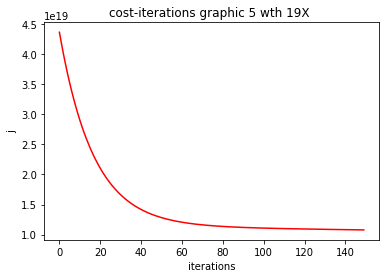

With final theta values of [163843.48141017  20733.5933778   65954.1985402   44801.68164768
   2555.92242206  53815.09313097  11166.77160935  45634.02787801
 101563.56436267 120828.40873485  52252.92677141  24292.76939798
  99664.5173377   20577.66158409  54080.29055548 135739.80517859
  41995.78018492  76507.54696365   3502.75478066]


In [ ]:
print(X)
print(theta5)
print('With initial theta values of {0}'.format(theta5))

# Run Gradient Descent
cost5, thetas5 = gradient_descent(X_train, y_train, theta5, alpha, iterations)
# Display cost chart
plotChart(np.arange(iterations), cost5, 'iterations', 'j', 'cost-iterations graphic 5 wth 19X ')


print('With final theta values of {0}'.format(thetas5[-1]))



In [ ]:
cost_function(X_train, y_train, thetas5[-1])

1.0769750411829367e+19

##Alpha 0.3 iter 150 theta rand (theta6)

In [ ]:
alpha = 0.3
iterations = 150
theta6= np.random.randn(X.shape[1])

[[1.00000000e+00 9.09090909e-02 1.25000000e-01 ... 2.17607973e-01
  1.61934263e-01 5.74235339e-03]
 [1.00000000e+00 9.09090909e-02 2.81250000e-01 ... 1.66112957e-01
  2.22164860e-01 8.02711852e-03]
 [1.00000000e+00 6.06060606e-02 1.25000000e-01 ... 2.37541528e-01
  3.99414903e-01 8.51301880e-03]
 ...
 [1.00000000e+00 6.06060606e-02 9.37500000e-02 ... 1.82724252e-01
  1.06866288e-01 1.55763777e-03]
 [1.00000000e+00 9.09090909e-02 3.12500000e-01 ... 3.73754153e-01
  1.73980382e-01 7.30573466e-04]
 [1.00000000e+00 6.06060606e-02 9.37500000e-02 ... 1.82724252e-01
  1.06866288e-01 8.10982495e-04]]
[ 0.40158061 -0.47153317  0.14320843  1.90579879 -0.24000711  0.00294448
 -1.13456965 -1.9233253   0.46146974  1.20287033 -0.34839929  0.14093428
 -0.50657919  2.39615115 -1.09916554 -0.84379138 -0.54283915 -1.67650365
  1.24645529]
With initial theta values of [ 0.40158061 -0.47153317  0.14320843  1.90579879 -0.24000711  0.00294448
 -1.13456965 -1.9233253   0.46146974  1.20287033 -0.34839929  0.1

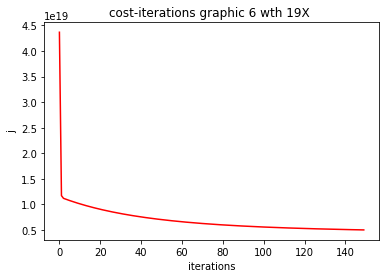

With final theta values of [-145456.74967593   41645.5582195   306445.36642223  356020.5586383
   15823.93823442  175291.27261661  168166.00227816  400924.2436782
   30696.91787958  423389.82866353  391621.89015272  237687.34726811
 -195481.57206034  110136.78364868 -114959.58919215  348217.31799893
  -81430.20355986  430868.5944242    12828.82272729]


In [ ]:
print(X)
print(theta6)
print('With initial theta values of {0}'.format(theta6))

# Run Gradient Descent
cost6, thetas6 = gradient_descent(X_train, y_train, theta6, alpha, iterations)
# Display cost chart
plotChart(np.arange(iterations), cost6, 'iterations', 'j', 'cost-iterations graphic 6 wth 19X ')


print('With final theta values of {0}'.format(thetas6[-1]))



In [ ]:
cost_function(X_train, y_train, thetas6[-1])

5.009619322117181e+18

#Test

##theta5

In [ ]:
thetas5[-1]

array([163843.48141017,  20733.5933778 ,  65954.1985402 ,  44801.68164768,
         2555.92242206,  53815.09313097,  11166.77160935,  45634.02787801,
       101563.56436267, 120828.40873485,  52252.92677141,  24292.76939798,
        99664.5173377 ,  20577.66158409,  54080.29055548, 135739.80517859,
        41995.78018492,  76507.54696365,   3502.75478066])

In [ ]:
X_test[0]

array([1.        , 0.12121212, 0.28125   , 0.13433962, 0.00507197,
       0.4       , 0.        , 0.        , 0.75      , 0.58333333,
       0.19517544, 0.        , 0.74782609, 0.        , 0.28787879,
       0.45504263, 0.29651163, 0.34262605, 0.00809719])

In [ ]:
y_test[0]

221900.0

In [ ]:
predict = X_test[0].dot(thetas5[-1])
predict

559880.0743081127

In [ ]:
predictAll = X_test.dot(thetas5[-1])
dfpredict = pd.DataFrame(predictAll)
dfpredict

,0
0,559880.074308
1,632900.112774
2,646400.825282
3,703365.426790
4,614539.404578
...,...
7128,464992.541437
7129,560411.228471
7130,579916.009458
7131,614959.540514


In [ ]:
errorAll = predictAll-y_test
errorAll

735      194880.074308
2830    -232099.887226
4106    -391599.174718
16218   -786634.573210
19964    -96460.595422
             ...      
15257    214992.541437
13822    112911.228471
18411    -50083.990542
20188     12959.540514
13030    212958.650827
Name: price, Length: 7133, dtype: float64